In [1]:
from marubatsu import Marubatsu, Marubatsu_GUI

def draw_board(self):   
    ax = self.ax
    ai = self.mb.ai
    
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")   
    
    # リプレイ中、ゲームの決着がついていた場合は背景色を変更する
    is_replay =  self.mb.move_count < len(self.mb.records) - 1 
    if self.mb.status == Marubatsu.PLAYING:
        facecolor = "lightcyan" if is_replay else "white"
    else:
        facecolor = "lightyellow"

    ax.figure.set_facecolor(facecolor)
        
    # 上部のメッセージを描画する
    # 対戦カードの文字列を計算する
    names = []
    for i in range(2):
        names.append("人間" if ai[i] is None else ai[i].__name__)
    ax.text(0, 3.5, f"{names[0]}　VS　{names[1]}", fontsize=20)   
    
    # ゲームの決着がついていない場合は、手番を表示する
    if self.mb.status == Marubatsu.PLAYING:
        text = "Turn " + self.mb.turn
    # 引き分けの場合
    elif self.mb.status == Marubatsu.DRAW:
        text = "Draw game"
    # 決着がついていれば勝者を表示する
    else:
        text = "Winner " + self.mb.status
    # リプレイ中の場合は "Replay" を表示する
    if is_replay:
        text += " Replay"
    ax.text(0, -0.2, text, fontsize=20)
    
    # ゲーム盤の枠を描画する
    for i in range(1, self.mb.BOARD_SIZE):
        ax.plot([0, self.mb.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.mb.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.mb.BOARD_SIZE):
        for x in range(self.mb.BOARD_SIZE):
            color = "red" if (x, y) == self.mb.last_move else "black"
            self.draw_mark(ax, x, y, self.mb.board[x][y], color)            

    self.update_widgets_status()  
    
Marubatsu_GUI.draw_board = draw_board

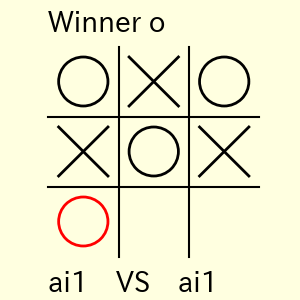

In [2]:
from util import gui_play
from ai import ai1

gui_play(ai=[ai1, ai1])

In [3]:
import ipywidgets as widgets

display(widgets.IntSlider())

IntSlider(value=0)

In [4]:
def on_slider_changed(changed):
    print(changed)

In [5]:
slider = widgets.IntSlider()
slider.observe(on_slider_changed, names="value")
display(slider)

IntSlider(value=0)

{'name': 'value', 'old': 0, 'new': 14, 'owner': IntSlider(value=14), 'type': 'change'}


In [6]:
def create_widgets(self):
    # AI を選択する Dropdown を作成する
    self.create_dropdown()
    # 変更、リセットボタンを作成する
    self.change_button = self.create_button("変更", 100)
    self.reset_button = self.create_button("リセット", 100)
    # リプレイのボタンとスライダーを作成する
    self.first_button = self.create_button("<<", 50)
    self.prev_button = self.create_button("<", 50)
    self.next_button = self.create_button(">", 50)
    self.last_button = self.create_button(">>", 50)     
    self.slider = widgets.IntSlider(layout=widgets.Layout(width="200px"))
    # ゲーム盤の画像を表す figure を作成する
    self.create_figure()       
    
Marubatsu_GUI.create_widgets = create_widgets

In [7]:
def display_widgets(self):
    # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
    hbox1 = widgets.HBox([self.dropdown_list[0], self.dropdown_list[1], self.change_button, self.reset_button])
    # リプレイ機能のボタンを横に配置した HBox を作成する
    hbox2 = widgets.HBox([self.first_button, self.prev_button, self.next_button, self.last_button, self.slider]) 
    # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
    display(widgets.VBox([hbox1, hbox2])) 
    
Marubatsu_GUI.display_widgets = display_widgets

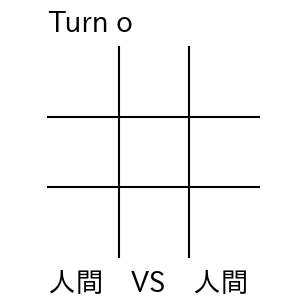

In [8]:
gui_play()

In [9]:
def update_widgets_status(self):
    # 0 手目と最後の着手を行った局面で、特定のリプレイに関するボタンを操作できないようにする
    self.set_button_status(self.first_button, self.mb.move_count <= 0)
    self.set_button_status(self.prev_button, self.mb.move_count <= 0)
    self.set_button_status(self.next_button, self.mb.move_count >= len(self.mb.records) - 1)
    self.set_button_status(self.last_button, self.mb.move_count >= len(self.mb.records) - 1)    
    self.slider.value = self.mb.move_count
    self.slider.max = len(self.mb.records) - 1
    
Marubatsu_GUI.update_widgets_status = update_widgets_status

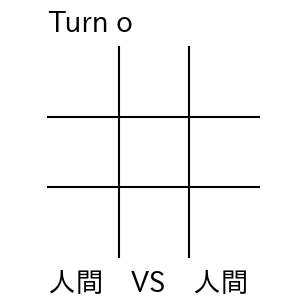

In [10]:
gui_play()

In [11]:
import math

def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b):
        self.mb.restart()
        on_change_button_clicked(b)
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b):
        change_step(0)

    def on_prev_button_clicked(b):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            self.draw_board()
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)
            
    # fig の画像にマウスを押した際のイベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

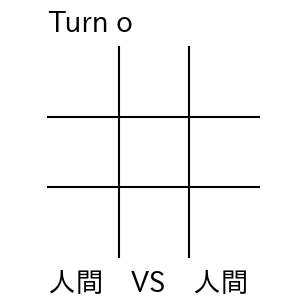

In [12]:
gui_play()

In [13]:
def create_widgets(self):
    # AI を選択する Dropdown を作成する
    self.create_dropdown()
    # 変更、リセット、待ったボタンを作成する
    self.change_button = self.create_button("変更", 50)
    self.reset_button = self.create_button("リセット", 80)
    self.undo_button = self.create_button("待った", 60)    
    
    # リプレイのボタンとスライダーを作成する
    self.first_button = self.create_button("<<", 50)
    self.prev_button = self.create_button("<", 50)
    self.next_button = self.create_button(">", 50)
    self.last_button = self.create_button(">>", 50)     
    self.slider = widgets.IntSlider(layout=widgets.Layout(width="200px"))
    # ゲーム盤の画像を表す figure を作成する
    self.create_figure()       
    
Marubatsu_GUI.create_widgets = create_widgets

In [14]:
def display_widgets(self):
    # 〇 と × の dropdown とボタンを横に配置した HBox を作成する
    hbox1 = widgets.HBox([self.dropdown_list[0], self.dropdown_list[1], self.change_button, self.reset_button, self.undo_button])
    # リプレイ機能のボタンを横に配置した HBox を作成する
    hbox2 = widgets.HBox([self.first_button, self.prev_button, self.next_button, self.last_button, self.slider]) 
    # hbox1 と hbox2 を縦に配置した VBox を作成し、表示する
    display(widgets.VBox([hbox1, hbox2])) 
    
Marubatsu_GUI.display_widgets = display_widgets

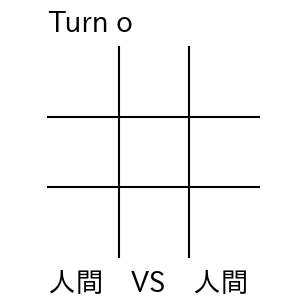

In [15]:
gui_play()

In [16]:
def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b):
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b):
        change_step(0)

    def on_prev_button_clicked(b):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            self.draw_board()
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)
            
    # fig の画像にマウスを押した際のイベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

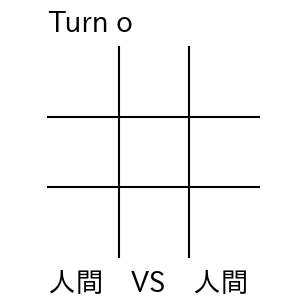

In [17]:
gui_play()

In [18]:
def update_widgets_status(self):
    self.set_button_status(self.undo_button, self.mb.move_count < 2 or self.mb.move_count != len(self.mb.records) - 1)
    # 0 手目と最後の着手を行った局面で、特定のリプレイに関するボタンを操作できないようにする
    self.set_button_status(self.first_button, self.mb.move_count <= 0)
    self.set_button_status(self.prev_button, self.mb.move_count <= 0)
    self.set_button_status(self.next_button, self.mb.move_count >= len(self.mb.records) - 1)
    self.set_button_status(self.last_button, self.mb.move_count >= len(self.mb.records) - 1)    
    self.slider.value = self.mb.move_count
    self.slider.max = len(self.mb.records) - 1
    
Marubatsu_GUI.update_widgets_status = update_widgets_status

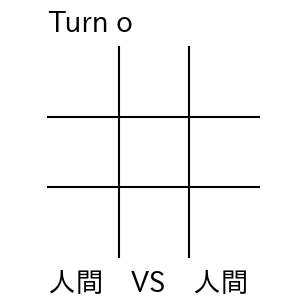

In [19]:
gui_play()

In [20]:
def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b):
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b):
        change_step(0)

    def on_prev_button_clicked(b):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            self.draw_board()
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    def on_key_press(event):
        print(event.key)            
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

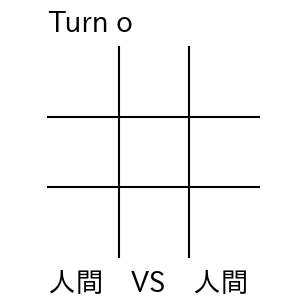

up
0
enter


In [21]:
gui_play()

In [22]:
import matplotlib as mlp

mlp.rcParams["keymap.save"] = []

In [23]:
attrs = [ "fullscreen", "home", "back", "forward", "pan", "zoom", "save", "help",
         "quit", "quit_all", "grid", "grid_minor", "yscale", "xscale", "copy"]
for attr in attrs:
    mlp.rcParams[f"keymap.{attr}"] = []

In [24]:
@staticmethod
def disable_shortcutkeys():
    attrs = [ "fullscreen", "home", "back", "forward", "pan", "zoom", "save", "help",
             "quit", "quit_all", "grid", "grid_minor", "yscale", "xscale", "copy"]
    for attr in attrs:
        mlp.rcParams[f"keymap.{attr}"] = []

Marubatsu_GUI.disable_shortcutkeys = disable_shortcutkeys

In [25]:
def __init__(self, mb, ai_dict=None, size=3):
    # ai_dict が None の場合は、空の list で置き換える
    if ai_dict is None:
        ai_dict = {}

    self.mb = mb
    self.ai_dict = ai_dict
    self.size = size
    
    # %matplotlib widget のマジックコマンドを実行する
    get_ipython().run_line_magic('matplotlib', 'widget')
        
    self.disable_shortcutkeys()
    self.create_widgets()
    self.create_event_handler()
    self.display_widgets()    
        
Marubatsu_GUI.__init__ = __init__

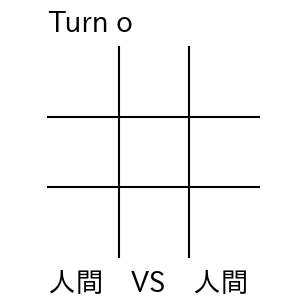

In [27]:
gui_play()

In [30]:
def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            self.draw_board()
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    def on_key_press(event):
        if event.key == "up":
            on_first_button_clicked()
        elif event.key == "left":
            on_prev_button_clicked()
        elif event.key == "right":
            on_next_button_clicked()
        elif event.key == "down":
            on_last_button_clicked()
        elif event.key == "0":
            on_undo_button_clicked()
        elif event.key == "enter":
            on_reset_button_clicked()
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

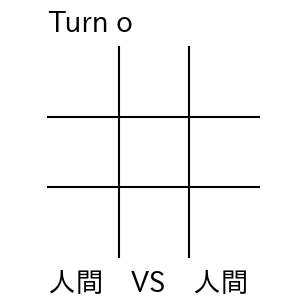

In [32]:
gui_play()

In [33]:
def create_event_handler(self):
    # 変更ボタンのイベントハンドラを定義する
    def on_change_button_clicked(b):
        for i in range(2):
            self.mb.ai[i] = None if self.dropdown_list[i].value == "人間" else self.dropdown_list[i].value
        self.mb.play_loop(self)

    # リセットボタンのイベントハンドラを定義する
    def on_reset_button_clicked(b=None):
        self.mb.restart()
        on_change_button_clicked(b)

    # 待ったボタンのイベントハンドラを定義する
    def on_undo_button_clicked(b=None):
        if self.mb.move_count >= 2 and self.mb.move_count == len(self.mb.records) - 1:
            self.mb.move_count -= 2
            self.mb.records = self.mb.records[0:self.mb.move_count+1]
            self.mb.change_step(self.mb.move_count)
            self.draw_board()
        
    # イベントハンドラをボタンに結びつける
    self.change_button.on_click(on_change_button_clicked)
    self.reset_button.on_click(on_reset_button_clicked)   
    self.undo_button.on_click(on_undo_button_clicked)   
    
    def change_step(step):
        self.mb.change_step(step)
        # 描画を更新する
        self.draw_board()        

    def on_first_button_clicked(b=None):
        change_step(0)

    def on_prev_button_clicked(b=None):
        change_step(self.mb.move_count - 1)

    def on_next_button_clicked(b=None):
        change_step(self.mb.move_count + 1)
        
    def on_last_button_clicked(b=None):
        change_step(len(self.mb.records) - 1)

    def on_slider_changed(changed):
        change_step(changed["new"])
            
    self.first_button.on_click(on_first_button_clicked)
    self.prev_button.on_click(on_prev_button_clicked)
    self.next_button.on_click(on_next_button_clicked)
    self.last_button.on_click(on_last_button_clicked)
    self.slider.observe(on_slider_changed, names="value")
    
    # ゲーム盤の上でマウスを押した場合のイベントハンドラ
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes and self.mb.status == Marubatsu.PLAYING:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.mb.move(x, y)                
            self.draw_board()
            # 次の手番の処理を行うメソッドを呼び出す
            self.mb.play_loop(self)

    def on_key_press(event):
        keymap = {
            "up": on_first_button_clicked,
            "left": on_prev_button_clicked,
            "right": on_next_button_clicked,
            "down": on_last_button_clicked,
            "0": on_undo_button_clicked,
            "enter": on_reset_button_clicked,            
        }
        if event.key in keymap:
            keymap[event.key]()
            
    # fig の画像イベントハンドラを結び付ける
    self.fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
    self.fig.canvas.mpl_connect("key_press_event", on_key_press)     
    
Marubatsu_GUI.create_event_handler = create_event_handler

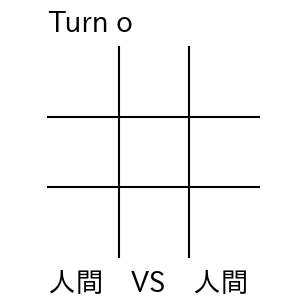

In [35]:
gui_play()